In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
path_archivo = "../input_data/lf_Isotropic.csv"
datos_full = pd.read_csv(path_archivo, delimiter=",")
datos_full = datos_full[datos_full["Cry_st"] != "Isotropic"]

Ellipsoid  Isotropic  Yes  3.8370819599325348  0.04366553973110348  \
0  Parallelepiped  Isotropic  Yes            5.382212             0.117379   
1        Cylinder  Isotropic  Yes            9.150183             0.069519   
2  Parallelepiped  Isotropic  Yes            4.986293             0.189782   
3        Cylinder  Isotropic  Yes            9.848248             0.181169   
4        Cylinder  Isotropic  Yes            8.833339             0.329782   

   0.49213127768851034  0.28312329982787365  2.601020507762225  \
0             0.337780             0.312557           2.551732   
1             0.355866             0.400724           2.282570   
2             0.270437             0.225842           2.093875   
3             0.146857             0.184659           2.255884   
4             0.105209             0.261677           2.291050   

   0.6010205077622249  0.6010205077622249.1  ...  1611.2663521558588  \
0            0.551732              0.551732  ...          401.679827   
1            0.282570              0.282570  ...          353.755515   
2            0.093875              0.093875  ...          423.787183   
3            0.255884              0.255884  ...          471.663142   
4            0.291050              0.291050  ...          370.945279   

   1619.2572530141624  1661.6284749840481  1774.2285098846648  \
0          412.208143          414.528960          420.917908   
1          371.176599          382.738521          386.537475   
2          433.367564          444.450416          445.090885   
3          472.320810          473.675356          476.879446   
4          374.596951          375.844821          376.058905   

   1790.8375394978286  1802.2783824665566  1812.0481584485358  \
0          422.971842          425.611246          443.184171   
1          388.289009          392.367966          394.890624   
2          446.149706          447.577613          453.427340   
3          479.060167          489.593832          490.130630   
4          382.846763          387.275134          389.638484   

   1873.6659770478377  1891.3562357367564  1920.358603010483  
0          447.545241          449.717835         449.997435  
1          397.578740          413.974686         415.596276  
2          454.492659          458.397023         463.020618  
3          493.885884          499.066681         505.068921  
4          396.438949          399.058194         405.173157  

[5 rows x 128 columns]

In [3]:
datos_full.head()

Shape       Cry_st Feasibility   Density        Lx        Ly  \
0  Parallelepiped  Orthorombic          No  8.367820  0.066164  0.410494   
1       Ellipsoid   Tetragonal          No  3.223706  0.462696  0.368702   
2       Ellipsoid  Orthorombic          No  5.434713  0.269970  0.026089   
3  Parallelepiped        Cubic          No  2.112116  0.303177  0.325563   
4        Cylinder        Cubic          No  6.393397  0.054734  0.217878   

         Lz       C00       C01       C02  ...  (omega^2)_90  (omega^2)_91  \
0  0.100738  5.443932  2.237448  0.857321  ...   1057.332596   1067.621072   
1  0.415514  1.690407  3.556153  0.642138  ...    386.096767    387.823634   
2  0.045545  5.279972  3.985330  4.688748  ...    191.103988    214.354675   
3  0.289477  2.254519  3.546974  3.546974  ...    167.671460    171.422680   
4  0.107691  0.387979  2.079239  2.079239  ...    666.332892    688.649818   

   (omega^2)_92  (omega^2)_93  (omega^2)_94  (omega^2)_95  (omega^2)_96  \
0   1080.774631   1086.202731   1086.274495   1092.459758   1101.550947   
1    397.682660    402.870597    406.553498    425.768561    433.355274   
2    259.380705    322.102144    482.336830    486.429686    490.295742   
3    172.822142    210.728656    251.820286    280.078131    295.624420   
4    775.806884    797.025589    807.303501    874.553462    896.305102   

   (omega^2)_97  (omega^2)_98  (omega^2)_99  
0   1103.689146   1126.968964   1132.538572  
1    437.338963    448.505570    456.987356  
2    805.490534   1093.738298   1355.946091  
3    325.246691    325.829650    341.938311  
4   1018.198437   1085.611552   1266.973752  

[5 rows x 128 columns]

In [4]:
print("Cantidad de datos posibles: ", len(datos_full[datos_full["Feasibility"] == "Yes"]))
print("Cantidad de datos imposibles: ", len(datos_full[datos_full["Feasibility"] == "No"]))

Cantidad de datos posibles:  4422
Cantidad de datos imposibles:  10419


In [5]:
datos_train, datos_test = train_test_split(datos_full, test_size = 0.35)
features = ["C00", "C11", "C22", "C33", "C44", "C55", "C01", "C02", "C12"]
X_full = datos_full[features]
y_full = datos_full["Feasibility"]

In [6]:
X_train = datos_train[features]
y_train = datos_train["Feasibility"]
X_test = datos_test[features]
y_test = datos_test["Feasibility"]

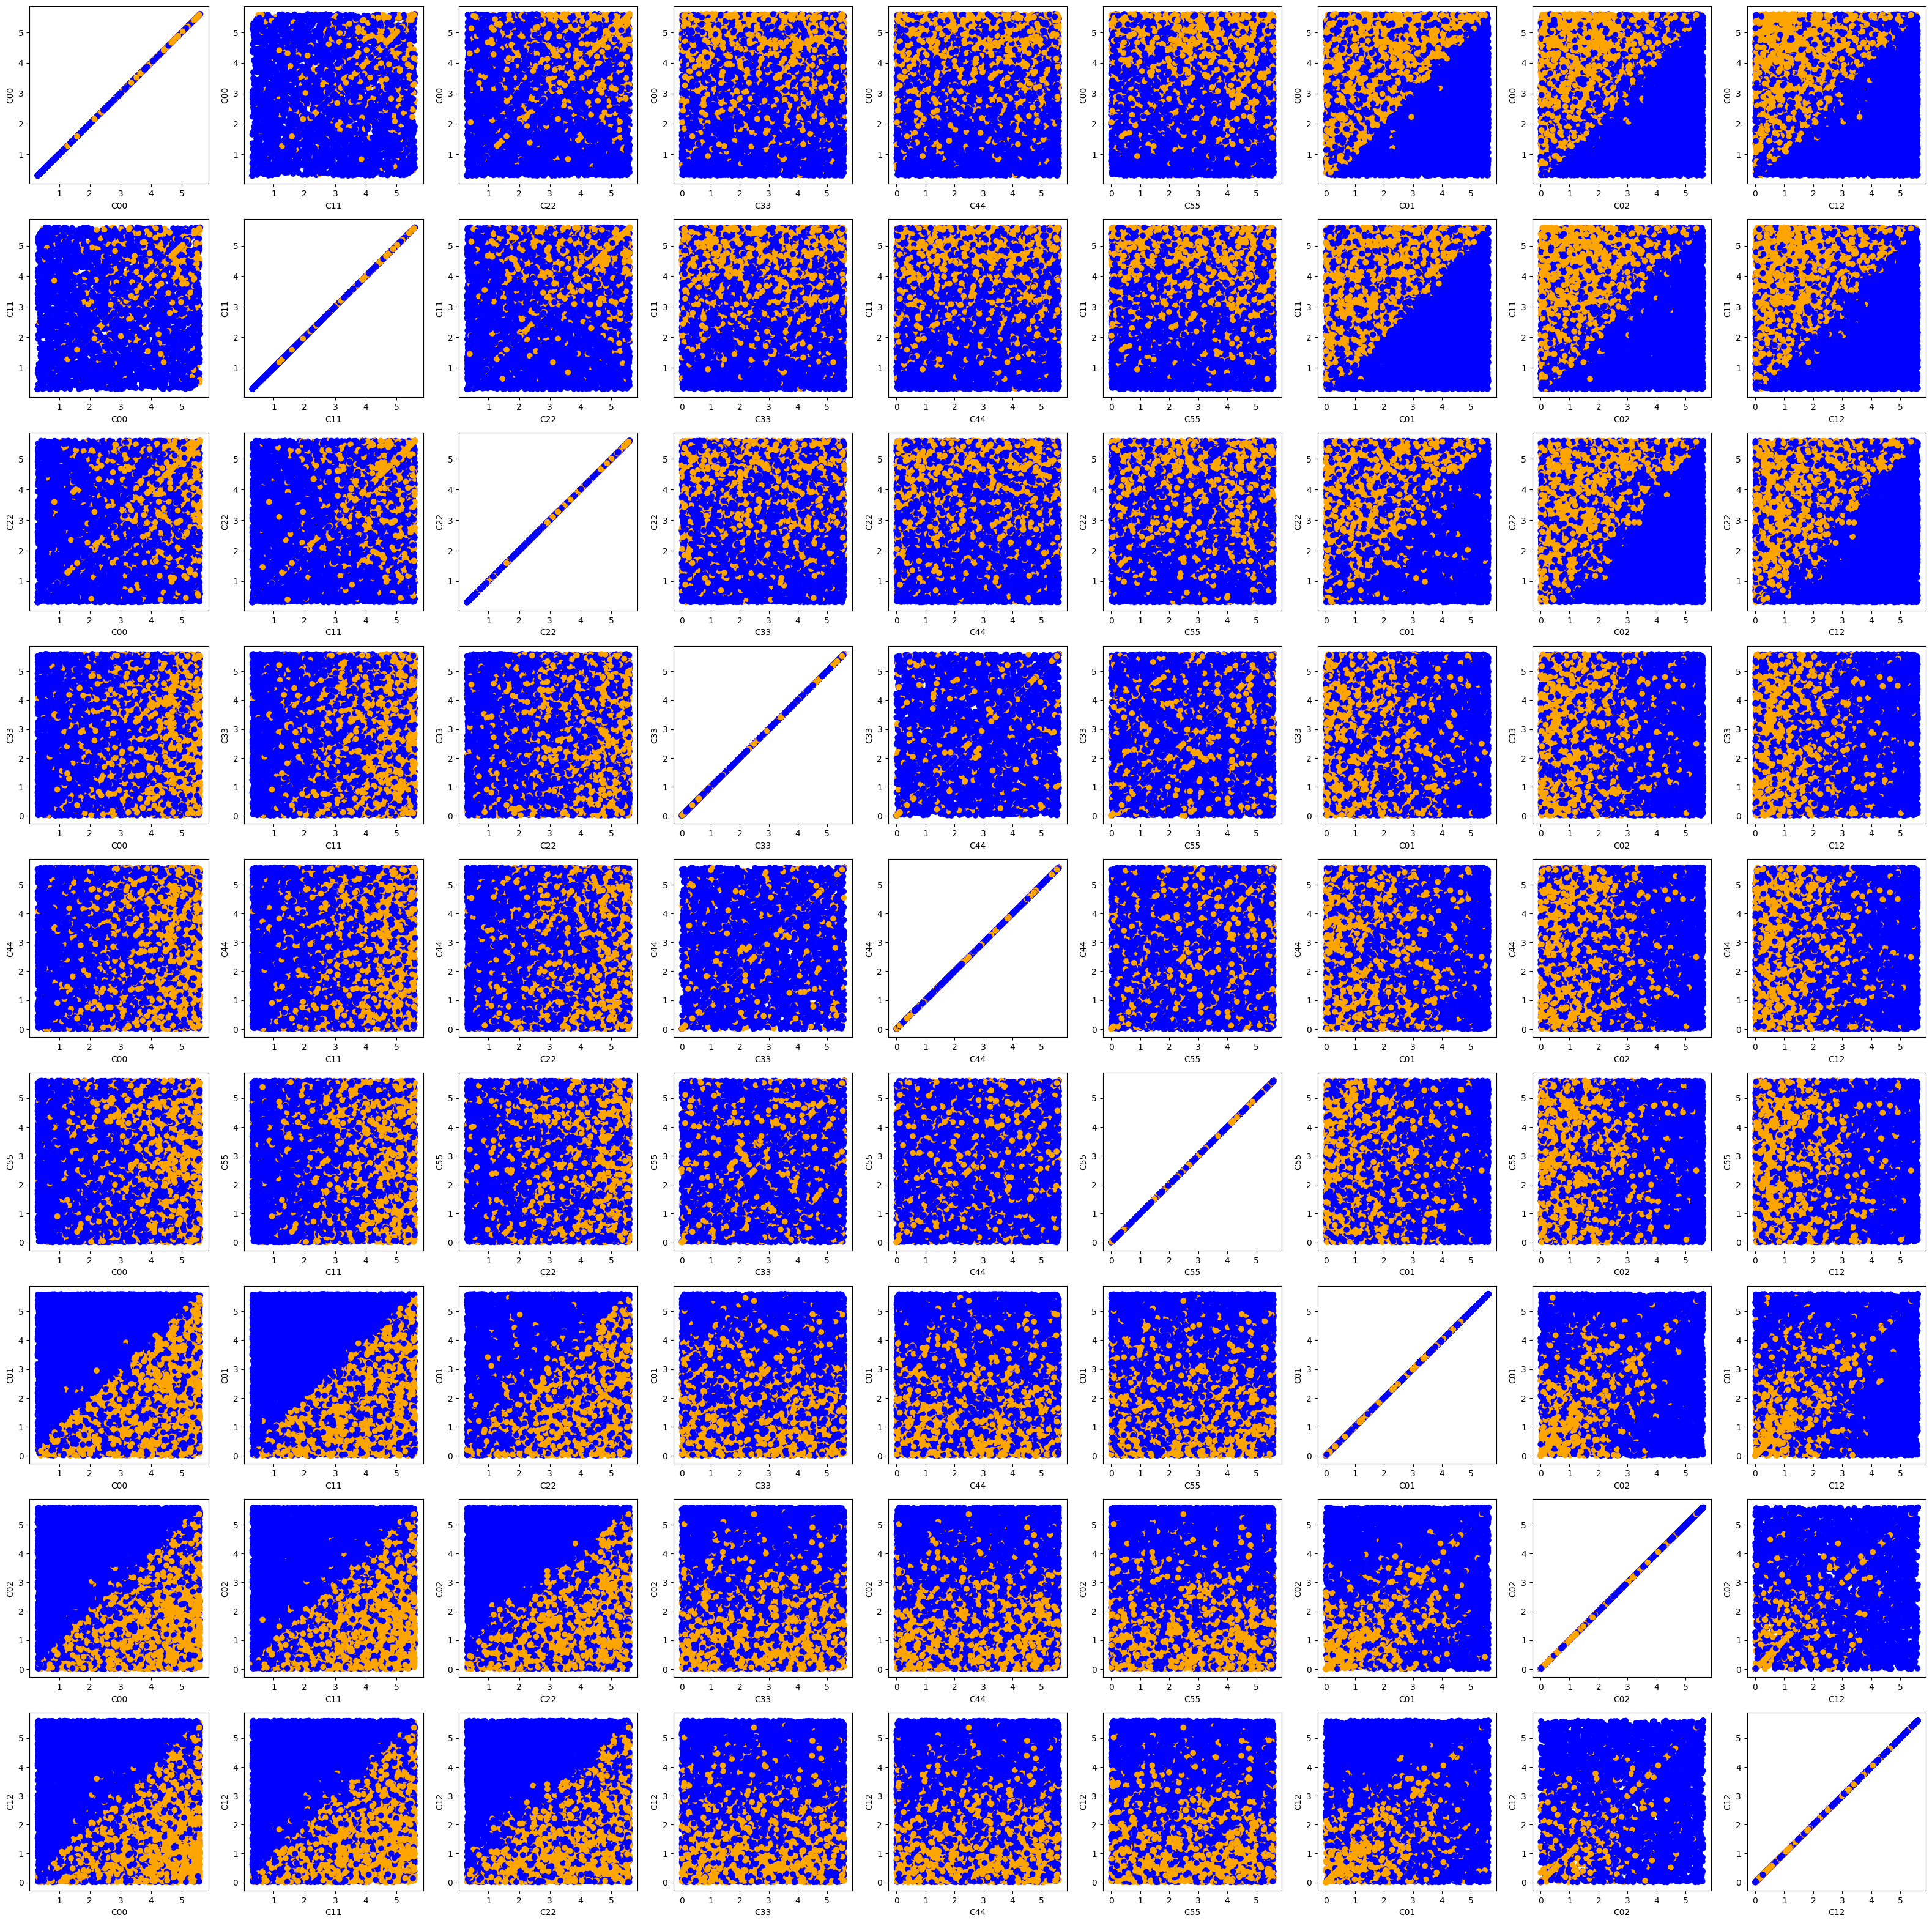

In [7]:
fig_full = plt.figure(figsize=(40,40))
colors_ref = {"No": "blue", "Yes": "orange"}
colors_array = list(map(lambda x: colors_ref[x], y_full))
for i, CX in enumerate(features):
    for j, CY in enumerate(features):
        ax = fig_full.add_subplot(len(features), len(features), i + 1 + len(features)*j)
        ax.scatter(X_full[CX], X_full[CY], c = colors_array)
        ax.set_xlabel(CX)
        ax.set_ylabel(CY)
    #fin for
#fin for 
plt.show()